# Data structures to hold the data

In [ ]:
class Element(object):
  """
    A single element which encapsulate a letter assciated with its probability, and code
  """
  def __init__(self, prob, let = "", code=""):
      """
        Probability of such letter
        code which will be computed
        letter for printing only
      """
      self.prob = prob
      self.code = code
      self.let = let

  def append_c(self, c):
    """
      Append 0, or 1 to the start of the code as the it propagates
    """
    self.code = c + self.code 

  def __gt__(self, other):
    """
      To decide wheter current object is greater than other object or not
      it depends on if the other is jus and element ==> then it compares probabilty
      if othe is list of elements ==> compares current probability with sum of probabilites of the other list
    """
    if isinstance(other, Element):
        if self.prob >= other.prob:
            return True
        return False
    if isinstance(other, ListElements):
        if self.prob >= other.get_sum_probs():
            return True
        return False

  def __str__(self):
      return "Letter: {}, Probability: {:.4f}, Code: {}".format(self.let,self.prob, self.code)

  def get_sum_probs(self):
      """
        Just returns the probability
      """
      return self.prob

  def __len__(self):
      return 1

In [ ]:
class ListElements(object):
    """
      List that can hold all elements, or list of elements
    """

    def __init__(self, elements):
        """
            elements: List[] of Element objects
        """
        self.lst = []
        for ele in elements:
            self.lst.append(ele)

    def get_sum_probs(self):
        """
        returns sum of probabilites in the list, if the list contains list, it loops over the inner list as well
        """
        sum_probs = 0
        for ele in self.lst:
            sum_probs += ele.get_sum_probs()
        return sum_probs

    def __str__(self):
        s = "Type: ListElements [ "
        for ele in self.lst:
            s += ele.__str__() + ", "
        s += "]"
        return s

    def __gt__(self, other):
        """
          compares sum of probabiltyes, it uses "get_sum_probs" which exists in both Element and ListElement,
          and depeneding on type of class, it decides which one it runs
        """
        if self.get_sum_probs() > other.get_sum_probs():
            return True
        return False

    def sort_me(self):
        """
           Sort the list besed on probabilites
        """
        self.lst = sorted(self.lst, reverse=True)
        return self

    def __len__(self):
        return len(self.lst)

    def get_orig_len(self):
        """
          return length of length without any modification
        """
        orig_len = 0
        for ele in self.lst:
            orig_len += len(ele)
        return orig_len

    def __getitem__(self, index):
        if index < 0:
            return self.lst[len(self.lst) - index]
        return self.lst[index]

    def trunc_last(self):
        """
          encapsulate last two elements in just one list and append that list in the right most of the original list
        """
        new_list = ListElements([self.lst[-1], self.lst[-2]])
        self.lst = self.lst[:-1]
        self.lst[-1] = new_list

    def append_all(self, c):
        """
          for earch element, which can be "Element" or ListElement" it call append_c to add either 0 or 1
          if it's list append the same character to the codes of the list.
        """
        for ele in self.lst:
            ele.append_c(c)

    def append_c(self, c=""):
        """
          Append character to the last two elemnets
        """
        last1 = self.lst[-1]
        last2 = self.lst[-2]
        if isinstance(last1, Element):
            last1.append_c("0")
        if isinstance(last1, ListElements):
            last1.append_all("0")

        if isinstance(last2, Element):
            last2.append_c("1")
        if isinstance(last2, ListElements):
            last2.append_all("1")

    def _unpack(self):
        """
        put all of them in just one list, and return the new one
        """
        unpacked_list = []
        for ele in self.lst:
            if isinstance(ele, Element):
                unpacked_list.append(ele)
            elif isinstance(ele, ListElements):
                unpacked_list.extend(ele.unpack())
        return unpacked_list

    def unpack(self):
        """
          Helper function to _unpack
        """
        return ListElements(self._unpack())

    def calc_avg_length(self):
        """
        return avg length of codes
        """
        avg = sum([x.prob * len(x.code) for x in self.lst])
        return avg

    @classmethod
    def get_list_of_elements(cls, probs, lets, is_100=True):
        """
        static function that ease the way of creating an object
        """
        lst_ele = []
        for p, t in zip(probs, lets):
            p = p / 100 if is_100 == True else p
            element = Element(p, t)
            lst_ele.append(element)
        return cls(lst_ele)

    def fine_print(self):
        """
          print the result in good way
        """
        for ele in self.lst:
            print(ele)

    def get_fine_dict(self):
        """
        return a dict of element for easy access
        """
        from collections import defaultdict
        d = defaultdict()
        for ele in self.lst:
            d[ele.let] = ele.code
        return d

    def get_probs_results(self):
      """
      return probs and results as just an array for further calculations
      """
      probs = []
      results = []
      for ele in self.lst:
          probs.append(ele.prob)
          results.append(ele.code)
      return probs, results

    def print_stats(self):
      """
        prrint the results of "calc_statistics"
      """
      infos, infos_diffs, entropy, avg_len, eff = self.calc_statistics(*self.get_probs_results())
      print("information for each elemnt: {}".format(infos))
      print("Entropy= {:.4f} \nAverage length= {:.4f} \nEfficiency= {:.4f}%".format(entropy, avg_len, eff))

    def calc_statistics(self, probs, result):
      """
      Calculates information in each elemnt, entropy, and avg length, and difference between informatoin adn length of code for each element
      """
      import math
      import numpy as np
      infos = [math.log2(1 / x) for x in probs]
      infos = [f'{item:.3f}' for item in infos]

      entropy = -np.sum(np.multiply(probs, np.log2(probs)))
      avg_len = np.sum(np.multiply(probs, np.array([len(x) for x in result])))
      eff = (entropy / avg_len) * 100
      infos_diffs = [len(x) - float(y) for (x, y) in zip(result, infos)]
      infos_diffs = [f'{item:.3f}' for item in infos_diffs]
      return infos, infos_diffs, entropy, avg_len, eff


    def print_summary(self):
      self.fine_print()
      self.print_stats()

# Huffman algorithm

Most of the logic depends heavily on data structures that i implmented which are "Element" and "ListElement"

So lets say that the input is 


```python
Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , 
Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , 
Probability: 0.1000, Code: , Letter: , Probability: 0.1500, Code: , Letter: ,
 Probability: 0.0500, Code: , Letter: , Probability: 0.0500, Code: , Letter: ,
  Probability: 0.0300, Code: , ]



```
simple steps:

1. first all of them will have "" as codes
2. add 0 in code of 0.03, and 1 in code of 0.05
3. encapsulate 0.03 and 0.05 in on list to be as follows


```python
Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , 
Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , 
Probability: 0.1000, Code: , Letter: , Probability: 0.1500, Code: , Letter: ,
 Probability: 0.0500, Code: , Letter: , ListElements(]Probability: 0.0500, Code: "0", Letter: ,
  Probability: 0.0300, Code: ,"1"]) ]
```
4. sort the elements; notice that the inner list have prob of 0.05 which is greater thatn 0.05, and it comes to that

```python
Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , 
Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , 
Probability: 0.1000, Code: , Letter: , Probability: 0.1500, Code: , Letter: ,
ListElements(]Probability: 0.0500, Code:"0" , Letter: ,
Probability: 0.0300, Code: ,"1"])
Probability: 0.0500, Code: , Letter: ,  ]

```
5. now after sorting, append 0 for element number 2 from the end, and append 1 for element number 1 from the end



```python
Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , 
Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , 
Probability: 0.1000, Code: , Letter: , Probability: 0.1500, Code: , Letter: ,
ListElements(]Probability: 0.0500, Code:"00" , Letter: ,
Probability: 0.0300, Code: ,"10"])
Probability: 0.0500, Code: , Letter: "1,  ]

```

6. encapsute last two elements, now the sum of last element is 0.05+0.05+0.03

```python
Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , 
Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , 
Probability: 0.1000, Code: , Letter: , Probability: 0.1500, Code: , Letter: ,
ListElements([ListElements([Probability: 0.0500, Code:"00" , Letter: ,
Probability: 0.0300, Code: ,"10"]), Probability: 0.0500, Code: , Letter: "1",])
 ]

```

7. and so on
8. note that if sum of elemnt of inner list is greate for example it's the second position whereas lenght of list is 5, then it will not append character as it was not involved in the addition process


In [ ]:
def run_huffman_algoirthm(lst_probs):
    if len(lst_probs) == 1: return  # Break the recursion
    lst_probs.sort_me()
    lst_probs.append_c()
    lst_probs.trunc_last()
    run_huffman_algoirthm(lst_probs)  # I'm assuming that I work with list which is mutable

# sample 

In [ ]:
lst = ListElements([Element(0.17), Element(0.3), Element(0.15), Element(0.1), Element(0.05), Element(0.15),
                    ListElements([Element(0.05), Element(0.03)])])
print(lst)
lst.sort_me()
print("After sorting: ", lst)
run_huffman_algoirthm(lst)
print("After huffman algorithm: ",lst)
new_lst = lst.unpack()
new_lst.sort_me()
print("After unpacking: ",new_lst)

Type: ListElements [ Letter: , Probability: 0.1700, Code: , Letter: , Probability: 0.3000, Code: , Letter: , Probability: 0.1500, Code: , Letter: , Probability: 0.1000, Code: , Letter: , Probability: 0.0500, Code: , Letter: , Probability: 0.1500, Code: , Type: ListElements [ Letter: , Probability: 0.0500, Code: , Letter: , Probability: 0.0300, Code: , ], ]
After sorting:  Type: ListElements [ Letter: , Probability: 0.3000, Code: , Letter: , Probability: 0.1700, Code: , Letter: , Probability: 0.1500, Code: , Letter: , Probability: 0.1500, Code: , Letter: , Probability: 0.1000, Code: , Type: ListElements [ Letter: , Probability: 0.0500, Code: , Letter: , Probability: 0.0300, Code: , ], Letter: , Probability: 0.0500, Code: , ]
After huffman algorithm:  Type: ListElements [ Type: ListElements [ Type: ListElements [ Letter: , Probability: 0.1700, Code: 00, Type: ListElements [ Letter: , Probability: 0.1000, Code: 110, Type: ListElements [ Letter: , Probability: 0.0500, Code: 0110, Type: Lis

In [ ]:
new_lst.fine_print()

Letter: , Probability: 0.3000, Code: 11
Letter: , Probability: 0.1700, Code: 00
Letter: , Probability: 0.1500, Code: 001
Letter: , Probability: 0.1500, Code: 100
Letter: , Probability: 0.1000, Code: 110
Letter: , Probability: 0.0500, Code: 1011
Letter: , Probability: 0.0500, Code: 0110
Letter: , Probability: 0.0300, Code: 0001


# English letters with probabilty

In [ ]:
lets = ['E', 'T','A', 'O','I','N','S','R','H','D','L','U','C','M','F','Y','W','G','P','B','V','K','X','Q','J','Z']
probs = [12.02,9.10,8.12,7.68,7.31,6.95,6.28,6.02,5.92,4.32,3.98,2.88,2.71,2.61,2.30,2.11,2.09,2.03,1.82,1.49,1.11,0.69,0.17,0.11,0.10,0.07]
lst = ListElements.get_list_of_elements(probs,lets)
print(lst)
run_huffman_algoirthm(lst)
new_lst = lst.unpack()
new_lst.sort_me()
print(new_lst)
new_lst.fine_print()
print("Average length", new_lst.calc_avg_length())
d = new_lst.get_fine_dict()
print(d)

Type: ListElements [ Letter: E, Probability: 0.1202, Code: , Letter: T, Probability: 0.0910, Code: , Letter: A, Probability: 0.0812, Code: , Letter: O, Probability: 0.0768, Code: , Letter: I, Probability: 0.0731, Code: , Letter: N, Probability: 0.0695, Code: , Letter: S, Probability: 0.0628, Code: , Letter: R, Probability: 0.0602, Code: , Letter: H, Probability: 0.0592, Code: , Letter: D, Probability: 0.0432, Code: , Letter: L, Probability: 0.0398, Code: , Letter: U, Probability: 0.0288, Code: , Letter: C, Probability: 0.0271, Code: , Letter: M, Probability: 0.0261, Code: , Letter: F, Probability: 0.0230, Code: , Letter: Y, Probability: 0.0211, Code: , Letter: W, Probability: 0.0209, Code: , Letter: G, Probability: 0.0203, Code: , Letter: P, Probability: 0.0182, Code: , Letter: B, Probability: 0.0149, Code: , Letter: V, Probability: 0.0111, Code: , Letter: K, Probability: 0.0069, Code: , Letter: X, Probability: 0.0017, Code: , Letter: Q, Probability: 0.0011, Code: , Letter: J, Probabil

we see here that the average length is the same as one given by Matlab

here is a screenshot from MATLAB
[link text](https://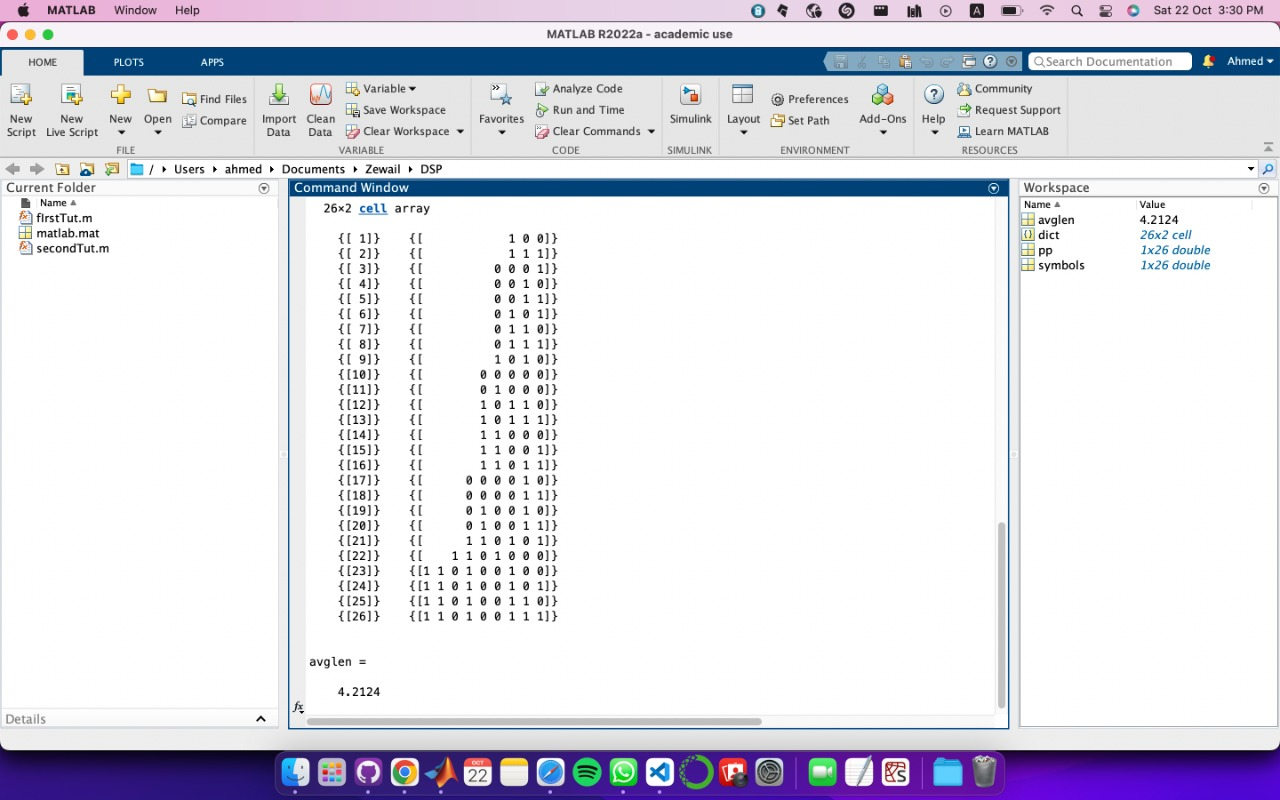)

In [ ]:
# new_lst.print_stats()
new_lst.print_summary()

Letter: E, Probability: 0.1202, Code: 011
Letter: T, Probability: 0.0910, Code: 100
Letter: A, Probability: 0.0812, Code: 0110
Letter: O, Probability: 0.0768, Code: 1001
Letter: I, Probability: 0.0731, Code: 1100
Letter: N, Probability: 0.0695, Code: 0110
Letter: S, Probability: 0.0628, Code: 1001
Letter: R, Probability: 0.0602, Code: 1100
Letter: H, Probability: 0.0592, Code: 1001
Letter: D, Probability: 0.0432, Code: 00011
Letter: L, Probability: 0.0398, Code: 00011
Letter: U, Probability: 0.0288, Code: 01001
Letter: C, Probability: 0.0271, Code: 11100
Letter: M, Probability: 0.0261, Code: 00011
Letter: F, Probability: 0.0230, Code: 10110
Letter: Y, Probability: 0.0211, Code: 11100
Letter: W, Probability: 0.0209, Code: 101001
Letter: G, Probability: 0.0203, Code: 111100
Letter: P, Probability: 0.0182, Code: 101001
Letter: B, Probability: 0.0149, Code: 111100
Letter: V, Probability: 0.0111, Code: 010110
Letter: K, Probability: 0.0069, Code: 0000011
Letter: X, Probability: 0.0017, Code

Here we see that we are very close to the Engtopy

Encoding a file

get_file_str: returns the file as string
encode_file encodes the file using codes which is input to the function

In [ ]:
def get_file_str(dir):
    with open(dir, 'r') as file:
      data = file.read().rstrip()
    return data


def encode_file(data, codes):
    op = []
    for c in data:
        c_code = codes[c]
        op.append(c_code)
    output_string = "".join(op)
    return output_string


data = get_file_str("/content/Test1.txt")
print("File: ",data)
codes = new_lst.get_fine_dict()
print("Codes: ", codes)
coded_file = encode_file(data,codes)
print("Coded file: ",coded_file)
print("Length of coded file",len(coded_file))



File:  THISISAPARAGRAPHTHATUSESEVERYSINGLELETTERINTHEALPHABETNOWTHATDOESNTMEANTHISCANBEAPARAGRAPHWITHNOSTORYBUTITDOESMEANTHATEVERYSINGLELETTERISUSEDYOUCANMAKEITASGENERICORFANCIFULASYOUDLIKEYOUCANTALKABOUTANYTHINGFROMQUILTSTOJETSTOXYLOPHONESOHYEAHANDYOUCANUSEWHATEVERLANGUAGEYOUWANTFROMAFRIKAANSTOZULUTHISISAPARAGRAPHTHATUSESEVERYSINGLELETTERINTHEALPHABETNOWTHATDOESNTMEANTHISCANBEAPARAGRAPHWITHNOSTORYBUTITDOESMEANTHATEVERYSINGLELETTERISUSEDYOUCANMAKEITASGENERICORFANCIFULASYOUD
Codes:  defaultdict(None, {'E': '011', 'T': '100', 'A': '0110', 'O': '1001', 'I': '1100', 'N': '0110', 'S': '1001', 'R': '1100', 'H': '1001', 'D': '00011', 'L': '00011', 'U': '01001', 'C': '11100', 'M': '00011', 'F': '10110', 'Y': '11100', 'W': '101001', 'G': '111100', 'P': '101001', 'B': '111100', 'V': '010110', 'K': '0000011', 'X': '11111100', 'Q': '101010110', 'J': '0000000011', 'Z': '0101010110'})
Coded file:  1001001110010011100100101101010010110110001101111001100011010100110011001001011010001001100101110010110

# Huffman based on file

return codes for english text file specifically


In [ ]:
def get_eng_codes_for_file():
  """
    data is just the string of the file
    to make sure that I have uniques letters from the file only, i put them into set, then put the output into list
    probs is calculated by dividing the count of char by its occurances in the text file
    I did the run huffman, and put the codes in new_lst
  """
  data =  get_file_str("/content/Test1.txt")
  all_chars = list(set(data))
  probs = [data.count(s)/len(all_chars) for s in all_chars]
  print(len(all_chars))
  print(len(probs))
  lst = ListElements.get_list_of_elements(probs,all_chars)
  run_huffman_algoirthm(lst)
  new_lst = lst.unpack()
  new_lst.sort_me()
  codes_dict = new_lst.get_fine_dict()
  return codes_dict

files_codes = get_eng_codes_for_file()

26
26


encoding the file using file-speicific codes

In [ ]:
def encode_file(data,codes):
  """
  """
  op = []
  for c in data:
      c_code = codes[c]
      op.append(c_code)
  output_string = "".join(op)
  return output_string
  
encoded_file = encode_file(data,files_codes)
print(encoded_file)
print("Length = {} ".format(len(encoded_file)))

1000110011010010110100110000001110000111001110000111000000110110100011010010010110100111010011100000011110001110110100101101100111001110011011100110100100110001101101100100011011010011100000011011010001011011010011000011010100110001101001000101100011110100111001000101101101001100100011001101001000011100110001011011010000001110000111001110000111000000110110010100101101000110110000111001100001100111011001011010110100011010001011000111101001010110110100110010001101001001100000011110001110110100101101100111001110011011100110100100110001101101001101101001110010110101100011101100000111001100010110100111110011001101001001001111001101100110001101100000110011001100001110011000000110110000011101101110010010011011000111011001011011100011011111001101011000111011000001110011001001001110011111001000101100011101101001001100101101000110011011001110000001100110011010110111111100101100110111001001001100001110101011011010010011000011010101001101101110000110000110110001111001101001001101101011011010001101

In [ ]:
1991-1966

25

Here we see that huffman codes for specific file is really close to huffman for general text files(using general q_i), the difference is only 25 bits.
But of course file-specific codes is shorter.